## Data Preprocessing:

#### 1. Import the necessary libraries and read the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
fifa = pd.read_csv('fifa.csv')

In [3]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa.shape

(18207, 60)

In [5]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [6]:
fifa.isnull().sum().sort_values(ascending=False)

Loaned From                 16943
Release Clause               1564
Joined                       1553
Contract Valid Until          289
Club                          241
Position                       60
Jersey Number                  60
Weak Foot                      48
Crossing                       48
FKAccuracy                     48
Curve                          48
Dribbling                      48
GKReflexes                     48
ShortPassing                   48
HeadingAccuracy                48
Finishing                      48
Weight                         48
Skill Moves                    48
Height                         48
Preferred Foot                 48
BallControl                    48
International Reputation       48
Body Type                      48
Work Rate                      48
LongPassing                    48
Volleys                        48
Acceleration                   48
Positioning                    48
GKPositioning                  48
GKKicking     

#### 2. Drop any columns that you deem un-necessary for analysis.

In [7]:
fifa.drop(columns = ['Loaned From','Photo','Flag','Club Logo','Jersey Number'],inplace = True)

#### 3. The following columns need to be converted for further analysis

In [8]:
print(fifa['Value'].head())
print(fifa['Value'].isnull().sum())

0    €110.5M
1       €77M
2    €118.5M
3       €72M
4      €102M
Name: Value, dtype: object
0


In [9]:
def clean_value(x):
    x = str(x)
    if len(x) > 0:
        if '€' in x:
            x = x.replace('€','')
        if 'M' in x:
            m = 10 ** 6
            x = x.replace('M','')
            x = str(float(x) * m)
        if 'K' in x:
            k = 10 ** 3
            x = x.replace('K','')
            x = str(float(x) * k)
    else:
        x = str(float(0))
    return float(x)

fifa['Value'] = fifa['Value'].apply(clean_value)
fifa['Value'].head()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

In [10]:
print(fifa['Wage'].head())
print(fifa['Wage'].isnull().sum())

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object
0


In [11]:
def clean_wage(x):
    x = str(x)
    if len(x) > 0:
        if '€' in x:
            x = x.replace('€','')
        if 'M' in x:
            m = 10 ** 6
            x = x.replace('M','')
            x = str(float(x) * m)
        if 'K' in x:
            k = 10 ** 3
            x = x.replace('K','')
            x = str(float(x) * k)
    else:
        x = str(float(0))
    return float(x)

fifa['Wage'] = fifa['Wage'].apply(clean_wage)
fifa['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

In [12]:
print(fifa['Joined'].head())
print(fifa['Joined'].isnull().sum())

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object
1553


In [13]:
fifa['Joined'] = pd.to_datetime(fifa['Joined'])
fifa['Joined'] = fifa['Joined'].apply(lambda x: x.year)
fifa['Joined'].fillna(fifa['Joined'].mean(),inplace=True)
fifa['Joined'] = fifa['Joined'].apply(lambda x: int(x))

print(fifa['Joined'].head())
print(fifa['Joined'].isnull().sum())

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int64
0


In [14]:
print(fifa['Contract Valid Until'].head())
print(fifa['Contract Valid Until'].isnull().sum())

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object
289


In [15]:
fifa['Contract Valid Until'] = pd.to_datetime(fifa['Contract Valid Until'])
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].apply(lambda x: x.year)
fifa['Contract Valid Until'].fillna(fifa['Contract Valid Until'].mean(),inplace=True)
fifa['Contract Valid Until'] = fifa['Contract Valid Until'].apply(lambda x: int(x))

print(fifa['Contract Valid Until'].head())
print(fifa['Contract Valid Until'].isnull().sum())

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: int64
0


In [16]:
print(fifa['Height'].head())
print(fifa['Height'].isnull().sum())

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object
48


In [17]:
fifa['Height'] = fifa['Height'].apply(lambda x: str(x))
fifa['Height'] = fifa['Height'].apply(lambda x: x.replace("'","."))
fifa['Height'] = fifa['Height'].apply(lambda x: float(x))
fifa['Height'].fillna(fifa['Height'].mean(),inplace=True)

print(fifa['Height'].head())
print(fifa['Height'].isnull().sum())

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64
0


In [18]:
print(fifa['Weight'].head())
print(fifa['Weight'].isnull().sum())

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object
48


In [19]:
fifa['Weight'] = fifa['Weight'].apply(lambda x: str(x))
fifa['Weight'] = fifa['Weight'].apply(lambda x: x.replace("lbs",""))
fifa['Weight'] = fifa['Weight'].apply(lambda x: float(x))
fifa['Weight'].fillna(fifa['Weight'].mean(),inplace=True)

print(fifa['Weight'].head())
print(fifa['Weight'].isnull().sum())

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64
0


In [20]:
print(fifa['Release Clause'].head())
print(fifa['Release Clause'].isnull().sum())

0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
Name: Release Clause, dtype: object
1564


In [21]:
def clean_release_clause(x):
    x = str(x)
    if len(x) > 0:
        if '€' in x:
            x = x.replace('€','')
        if 'M' in x:
            m = 10 ** 6
            x = x.replace('M','')
            x = str(float(x) * m)
        if 'K' in x:
            k = 10 ** 3
            x = x.replace('K','')
            x = str(float(x) * k)
    else:
        x = str(float(0))
    return float(x)


fifa['Release Clause']=fifa['Release Clause'].apply(clean_release_clause)
fifa['Release Clause'].fillna(fifa['Release Clause'].mean(),inplace=True)

print(fifa['Release Clause'].head())
print(fifa['Release Clause'].isnull().sum())

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64
0


## Exploratory Data Analysis:

#### 1. Plot the distribution of Overall rating for all players. 

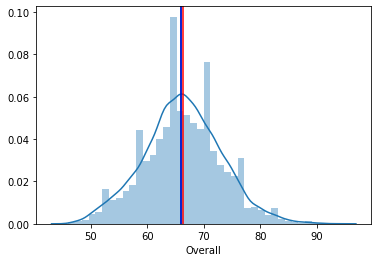

In [22]:
sns.distplot(fifa['Overall'],bins=40)
plt.axvline(fifa['Overall'].mean(),color='r')
plt.axvline(fifa['Overall'].median(),color='g')
plt.axvline(fifa['Overall'].mode()[0],color='b')
plt.show()

#### 2. Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

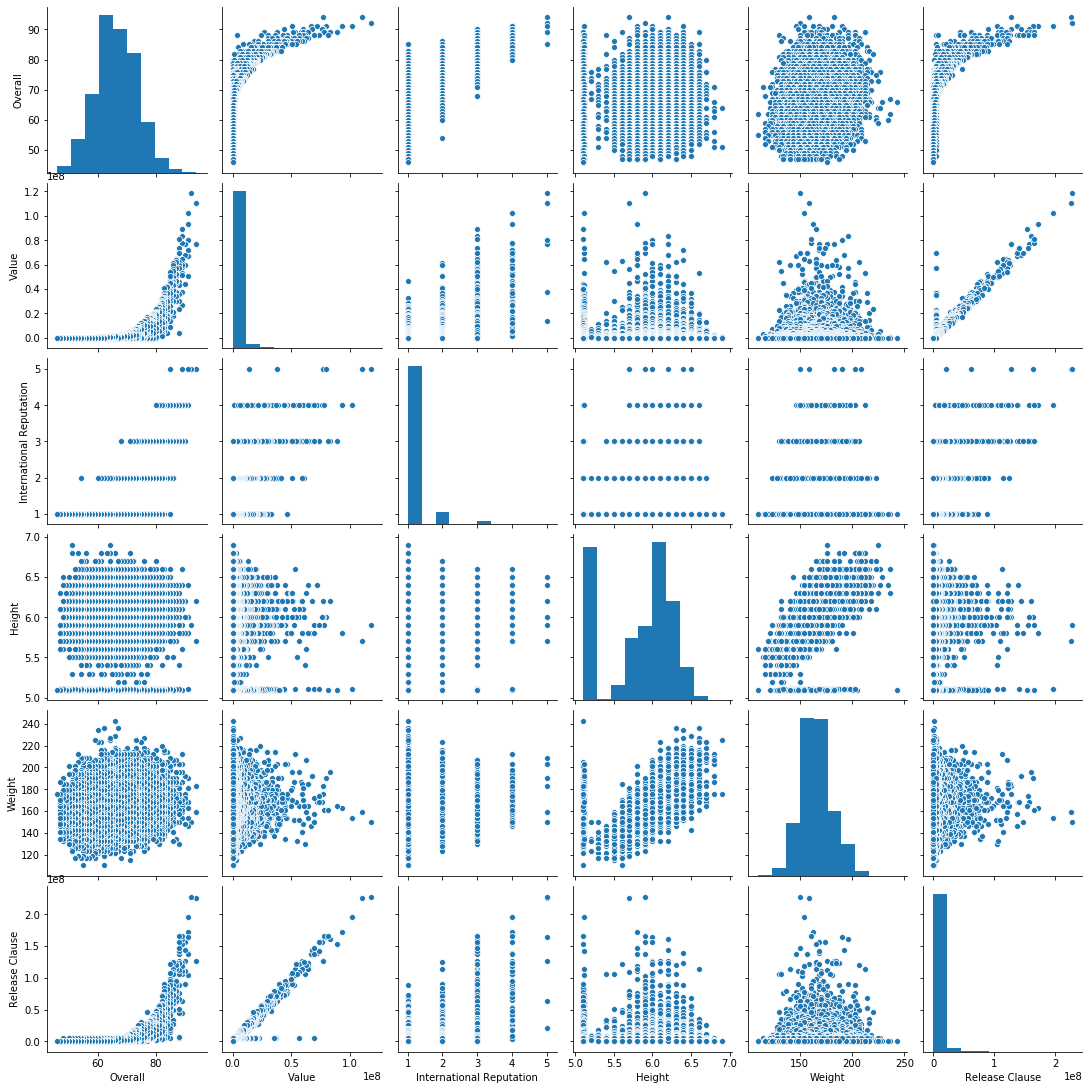

In [23]:
sns.pairplot(fifa[["Overall","Value","International Reputation","Height","Weight","Release Clause"]])
plt.show()

#### 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [24]:
fifa['Overall_Ranking'] = fifa['Overall'].rank(method='dense',ascending=False)

In [25]:
top20players = fifa[fifa['Contract Valid Until'] == 2020][['ID','Name','Club','Age','Wage','Value','Contract Valid Until','Overall','Overall_Ranking']].head(20)

In [26]:
top20players

,ID,Name,Club,Age,Wage,Value,Contract Valid Until,Overall,Overall_Ranking
3,193080,De Gea,Manchester United,27,260000.0,72000000.0,2020,91,3.0
5,183277,E. Hazard,Chelsea,27,340000.0,93000000.0,2020,91,3.0
6,177003,L. Modrić,Real Madrid,32,420000.0,67000000.0,2020,91,3.0
8,155862,Sergio Ramos,Real Madrid,32,380000.0,51000000.0,2020,91,3.0
13,168542,David Silva,Manchester City,32,285000.0,60000000.0,2020,90,4.0
21,179813,E. Cavani,Paris Saint-Germain,31,200000.0,60000000.0,2020,89,5.0
24,138956,G. Chiellini,Juventus,33,215000.0,27000000.0,2020,89,5.0
31,190460,C. Eriksen,Tottenham Hotspur,26,205000.0,73500000.0,2020,88,6.0
39,164240,Thiago Silva,Paris Saint-Germain,33,165000.0,24000000.0,2020,88,6.0
46,193041,K. Navas,Real Madrid,31,195000.0,30500000.0,2020,87,7.0


#### a) What would the average wage for this set of players be?

In [27]:
top20players['Wage'].mean()

205150.0

#### b) What is the average age?

In [28]:
top20players['Age'].mean()

29.95

#### c) Is there a correlation between the Overall rating and Value for these players?

In [29]:
top20players[['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,0.666788
Value,0.666788,1.000000


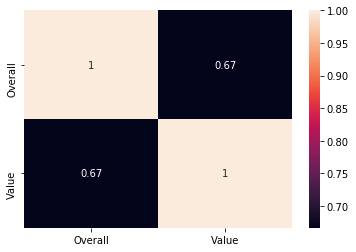

In [30]:
sns.heatmap(top20players[['Overall','Value']].corr(),annot=True)

Observation: Overall rating and Value have positive correaltion of 0.67

In [31]:
fifa['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [32]:
fifa['Position'].nunique()

27

#### 4. Generate tables containing the top 5 players by Overall rating for each unique position.

In [33]:
top5players  = fifa[fifa['Position'].isna() == False].groupby(by='Position')['Position','Overall','ID','Wage'].head()
top5players.sort_values(['Position','Overall'],ascending=[True,False])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Position,Overall,ID,Wage
17,CAM,89,194765,145000.0
31,CAM,88,190460,205000.0
61,CAM,86,201942,195000.0
66,CAM,86,189596,135000.0
74,CAM,86,176635,190000.0
...,...,...,...,...
1,ST,94,20801,405000.0
10,ST,90,188545,205000.0
16,ST,89,202126,205000.0
23,ST,89,153079,300000.0


In [34]:
pos = fifa['Position'].dropna().unique()
for i in pos:
    print("The top 5 players by overall rating for",i,)
    display(top5players[top5players['Position']==i])

The top 5 players by overall rating for RF


,Position,Overall,ID,Wage
0,RF,94,158023,565000.0
50,RF,87,175943,135000.0
528,RF,80,172114,12000.0
890,RF,78,150516,11000.0
1774,RF,75,201313,17000.0


The top 5 players by overall rating for ST


,Position,Overall,ID,Wage
1,ST,94,20801,405000.0
10,ST,90,188545,205000.0
16,ST,89,202126,205000.0
23,ST,89,153079,300000.0
36,ST,88,173731,355000.0


The top 5 players by overall rating for LW


,Position,Overall,ID,Wage
2,LW,92,190871,290000.0
29,LW,88,198219,165000.0
30,LW,88,197781,315000.0
32,LW,88,189242,340000.0
55,LW,86,222492,195000.0


The top 5 players by overall rating for GK


,Position,Overall,ID,Wage
3,GK,91,193080,260000.0
9,GK,90,200389,94000.0
18,GK,89,192448,240000.0
19,GK,89,192119,240000.0
22,GK,89,167495,130000.0


The top 5 players by overall rating for RCM


,Position,Overall,ID,Wage
4,RCM,91,192985,355000.0
6,RCM,91,177003,420000.0
53,RCM,87,168651,260000.0
82,RCM,85,212622,92000.0
83,RCM,85,208421,77000.0


The top 5 players by overall rating for LF


,Position,Overall,ID,Wage
5,LF,91,183277,340000.0
15,LF,89,211110,205000.0
76,LF,86,41,21000.0
272,LF,82,198164,31000.0
1379,LF,76,190577,9000.0


The top 5 players by overall rating for RS


,Position,Overall,ID,Wage
7,RS,91,176580,455000.0
109,RS,85,41236,15000.0
148,RS,84,167397,115000.0
267,RS,82,199451,28000.0
357,RS,81,202685,48000.0


The top 5 players by overall rating for RCB


,Position,Overall,ID,Wage
8,RCB,91,155862,380000.0
39,RCB,88,164240,165000.0
54,RCB,87,152729,240000.0
62,RCB,86,201535,210000.0
70,RCB,86,184344,160000.0


The top 5 players by overall rating for LCM


,Position,Overall,ID,Wage
11,LCM,90,182521,355000.0
13,LCM,90,168542,285000.0
52,LCM,87,171877,125000.0
63,LCM,86,199556,135000.0
114,LCM,84,212198,22000.0


The top 5 players by overall rating for CB


,Position,Overall,ID,Wage
12,CB,90,182493,125000.0
42,CB,87,205600,205000.0
73,CB,86,177509,160000.0
89,CB,85,192366,170000.0
102,CB,85,171919,38000.0


The top 5 players by overall rating for LDM


,Position,Overall,ID,Wage
14,LDM,89,215914,225000.0
91,LDM,85,187961,235000.0
119,LDM,84,207865,90000.0
217,LDM,83,176266,64000.0
323,LDM,81,228702,19000.0


The top 5 players by overall rating for CAM


,Position,Overall,ID,Wage
17,CAM,89,194765,145000.0
31,CAM,88,190460,205000.0
61,CAM,86,201942,195000.0
66,CAM,86,189596,135000.0
74,CAM,86,176635,190000.0


The top 5 players by overall rating for CDM


,Position,Overall,ID,Wage
20,CDM,89,189511,315000.0
27,CDM,88,200145,285000.0
72,CDM,86,180206,180000.0
75,CDM,86,135507,185000.0
118,CDM,84,209499,120000.0


The top 5 players by overall rating for LS


,Position,Overall,ID,Wage
21,LS,89,179813,200000.0
38,LS,88,167664,245000.0
100,LS,85,179844,100000.0
151,LS,84,143076,53000.0
174,LS,83,208093,53000.0


The top 5 players by overall rating for LCB


,Position,Overall,ID,Wage
24,LCB,89,138956,215000.0
34,LCB,88,178603,160000.0
44,LCB,87,201024,115000.0
51,LCB,87,172871,155000.0
59,LCB,86,203376,165000.0


The top 5 players by overall rating for RM


,Position,Overall,ID,Wage
25,RM,88,231747,100000.0
26,RM,88,209331,255000.0
122,RM,84,204970,72000.0
137,RM,84,185020,105000.0
138,RM,84,183898,125000.0


The top 5 players by overall rating for LAM


,Position,Overall,ID,Wage
28,LAM,88,198710,315000.0
365,LAM,81,199434,26000.0
1587,LAM,75,230408,31000.0
2247,LAM,74,230487,13000.0
2342,LAM,74,230276,23000.0


The top 5 players by overall rating for LM


,Position,Overall,ID,Wage
33,LM,88,188567,265000.0
58,LM,86,208722,195000.0
65,LM,86,190483,175000.0
68,LM,86,188350,100000.0
86,LM,85,193747,88000.0


The top 5 players by overall rating for LB


,Position,Overall,ID,Wage
35,LB,88,176676,285000.0
49,LB,87,189332,250000.0
64,LB,86,191043,160000.0
85,LB,85,197445,110000.0
106,LB,85,164169,81000.0


The top 5 players by overall rating for RDM


,Position,Overall,ID,Wage
45,RDM,87,195864,210000.0
134,RDM,84,190584,51000.0
198,RDM,83,193474,125000.0
223,RDM,83,53302,80000.0
298,RDM,82,183498,59000.0


The top 5 players by overall rating for RW


,Position,Overall,ID,Wage
56,RW,86,218667,180000.0
60,RW,86,202652,195000.0
79,RW,85,220834,215000.0
84,RW,85,204485,205000.0
93,RW,85,184941,215000.0


The top 5 players by overall rating for CM


,Position,Overall,ID,Wage
67,CM,86,189509,130000.0
78,CM,85,223848,73000.0
121,CM,84,205498,155000.0
136,CM,84,186942,175000.0
161,CM,83,220971,120000.0


The top 5 players by overall rating for RB


,Position,Overall,ID,Wage
69,RB,86,184432,175000.0
123,RB,84,204963,185000.0
135,RB,84,188377,165000.0
192,RB,83,199564,170000.0
216,RB,83,177457,82000.0


The top 5 players by overall rating for RAM


,Position,Overall,ID,Wage
129,RAM,84,193082,150000.0
171,RAM,83,208670,28000.0
1705,RAM,75,230465,22000.0
2242,RAM,74,230483,13000.0
2322,RAM,74,230267,14000.0


The top 5 players by overall rating for CF


,Position,Overall,ID,Wage
271,CF,82,198706,67000.0
293,CF,82,184431,15000.0
350,CF,81,205175,71000.0
382,CF,81,187072,43000.0
407,CF,81,144622,41000.0


The top 5 players by overall rating for RWB


,Position,Overall,ID,Wage
450,RWB,80,207862,28000.0
465,RWB,80,203605,39000.0
517,RWB,80,180216,97000.0
652,RWB,79,197083,33000.0
766,RWB,78,221342,24000.0


The top 5 players by overall rating for LWB


,Position,Overall,ID,Wage
474,LWB,80,200536,37000.0
581,LWB,79,223682,37000.0
601,LWB,79,210455,43000.0
605,LWB,79,208334,26000.0
787,LWB,78,214026,28000.0


#### a) Are there any players appearing in more than one Table. Please point out such players.

In [35]:
top5PlayerIds = top5players['ID'].value_counts()
top5PlayerIds[top5PlayerIds>1]

Series([], Name: ID, dtype: int64)

#### b)What is the average wage one can expect to pay for the top 5 in every position?

In [36]:
for i in pos:
    print('The average wage for top 5 players in position',i,'is =',top5players[top5players['Position']==i]['Wage'].mean())

The average wage for top 5 players in position RF is = 148000.0
The average wage for top 5 players in position ST is = 294000.0
The average wage for top 5 players in position LW is = 261000.0
The average wage for top 5 players in position GK is = 192800.0
The average wage for top 5 players in position RCM is = 240800.0
The average wage for top 5 players in position LF is = 121200.0
The average wage for top 5 players in position RS is = 132200.0
The average wage for top 5 players in position RCB is = 231000.0
The average wage for top 5 players in position LCM is = 184400.0
The average wage for top 5 players in position CB is = 139600.0
The average wage for top 5 players in position LDM is = 126600.0
The average wage for top 5 players in position CAM is = 174000.0
The average wage for top 5 players in position CDM is = 217000.0
The average wage for top 5 players in position LS is = 130200.0
The average wage for top 5 players in position LCB is = 162000.0
The average wage for top 5 player